In [2]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Generating synthetic data
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)  # Two features: visit duration and pages visited
labels = (features[:, 0] + features[:, 1] > 1).astype(int)  # Purchase (1) or not (0)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels

# Print the 'features' array
print("--- Features Array (NumPy) ---")
print(features)
print("\nShape of features array:", features.shape)
print("Type of features array:", type(features))

# Print the 'df' DataFrame
print("\n--- DataFrame (Pandas) ---")
print(df)
print("\nShape of DataFrame:", df.shape)
print("Type of DataFrame:", type(df))
print("\nInfo of DataFrame:")
df.info()
print("\nHead of DataFrame:")
print(df.head())
print("\nTail of DataFrame:")
print(df.tail())

--- Features Array (NumPy) ---
[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]
 [0.79172504 0.52889492]
 [0.56804456 0.92559664]
 [0.07103606 0.0871293 ]
 [0.0202184  0.83261985]
 [0.77815675 0.87001215]
 [0.97861834 0.79915856]
 [0.46147936 0.78052918]
 [0.11827443 0.63992102]
 [0.14335329 0.94466892]
 [0.52184832 0.41466194]
 [0.26455561 0.77423369]
 [0.45615033 0.56843395]
 [0.0187898  0.6176355 ]
 [0.61209572 0.616934  ]
 [0.94374808 0.6818203 ]
 [0.3595079  0.43703195]
 [0.6976312  0.06022547]
 [0.66676672 0.67063787]
 [0.21038256 0.1289263 ]
 [0.31542835 0.36371077]
 [0.57019677 0.43860151]
 [0.98837384 0.10204481]
 [0.20887676 0.16130952]
 [0.65310833 0.2532916 ]
 [0.46631077 0.24442559]
 [0.15896958 0.11037514]
 [0.65632959 0.13818295]
 [0.19658236 0.36872517]
 [0.82099323 0.09710128]
 [0.83794491 0.09609841]
 [0.97645947 0.4686512 ]
 [0.97676109 0.60484552]
 [0.73926358 0.03918779]
 [0.28280696 0.1201

In [4]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['VisitDuration', 'PagesVisited']], df['Purchase'], test_size=0.2, random_state=42)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4228 - loss: 0.7097 - val_accuracy: 0.4688 - val_loss: 0.7068
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5021 - loss: 0.6910 - val_accuracy: 0.4688 - val_loss: 0.7001
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5184 - loss: 0.6904 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5974 - loss: 0.6846 - val_accuracy: 0.5312 - val_loss: 0.6872
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6526 - loss: 0.6761 - val_accuracy: 0.5938 - val_loss: 0.6806
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6995 - loss: 0.6601 - val_accuracy: 0.6250 - val_loss: 0.6752
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6589 - loss: 0.6675 - val_accuracy: 0.6250 - val_loss: 0.6691
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7045 - loss: 0.6606 - val_accuracy: 0.6875 - 

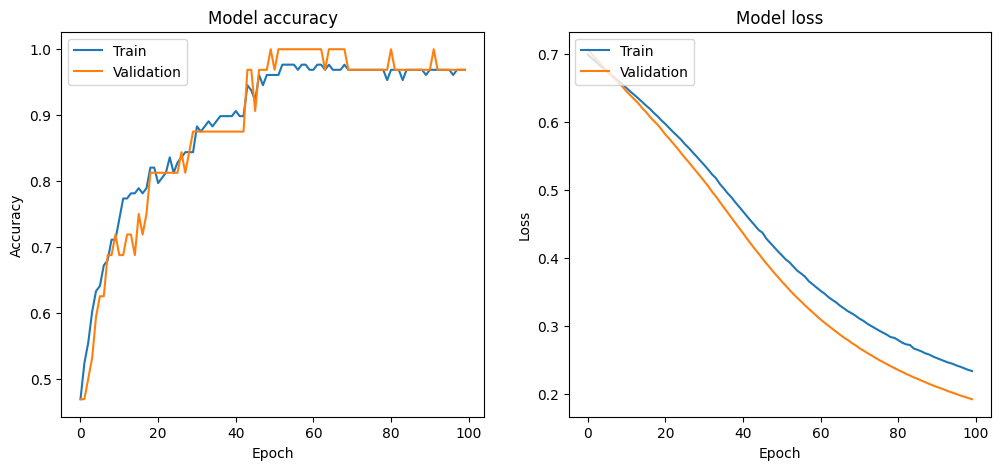

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Input layer with 2 features
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=100, batch_size=5, validation_split=0.2)

# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [17]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9187 - loss: 0.2645
Test Accuracy: 0.925000011920929
